This First cell is just importing the data I need for the demonstration, it can be safely ignored/augmented for individual use.

In [31]:
import numpy as np
import statsmodels.api as sm
import math
import pickle
import random as ran
import spanPy as sP
import chainZones as cZ


def autoCorrFilter(x, nlags, stCoeff=1):
    """Return the autocorrelation stoppage point for a particular data stream"""
    acfmodel = sm.tsa.acf(x, nlags=nlags)
    zeroPoint = acfmodel.tolist()
    zeroPoint = findZero(zeroPoint)
    # Concat the arrays that you need to
    if zeroPoint * stCoeff > len(acfmodel):
        return len(acfmodel) - 1
    else:
        return zeroPoint * stCoeff


def findZero(x):
    """Return the zero minima of a particular signal"""
    x = np.array(x)
    nCheck = np.where(x < 0)
    nIdx = nCheck[0][0]
    return nIdx - 1

def genColor(num):
    """Return a color array for plotting functionalities"""
    retDict = {}
    for i in range(num):
        r = ran.random()
        g = ran.random()
        b = ran.random()
        retDict[i] = [r, g, b, 0.5]
    return retDict

mains = []
X = []
Y = []
zoneDicts = []
spanMaps = {}

for i in [0]:
    # Open the pickle file for run "i"
    runPacket = open(f'C:/Users/...','rb')

    # Load in the data contained in the pickle file
    data = pickle.load(runPacket)

    # Close the pickle file after read-in
    runPacket.close()

    # Choose the R and Theta from the data oacket
    x, y = data[3], data[1]

    x = x * (3 / math.pi)
    y = y / y[0]

    # Get the truncating index
    cutIdx = autoCorrFilter(y, len(y), 2)

    # Truncate the timeseries
    x, y, = x[0:cutIdx], y[0:cutIdx]
    X.append(x)
    Y.append(y)

    minPoints = 50

    #for k in range(4,10):
    L = 7

    # Create the zones, according to level L
    zoneDict = cZ.makeZones(x, y, 'Wedge', 'noSector', L, 50)

    # Get the time series of zones
    zoneList = cZ.assignZones(x, y, zoneDict)

    # Apeend the time series to the list of timeseries', mains
    mains.append(zoneList[-1])


This next cell shows the instantiation of the three main objects of spanPy:

    -SiSet :: (Type=set) Complete set of all spans one can create out of the time series of interest

    -SiMap :: (Type = dict) A dictionary, or mapping, whos keys are the zones found in the time series. Let z denote such a zone, the SiMap[z] will return the span which has z as its defining zone

    -SiTMap:: (Type = dict) A dictionary, or mapping, whose keys are the time steps (0,2,3,...,T-1) where T is the number of time steps recorded in the time series. Let 0<t<T-1, then SiTMap[t] returns a list (literally) of all the spans which are defined at time t

    Note: (as of 4/13/23) getSiTMap is currently very inefficient both in terms of memory usage and execution time. It is still being worked on, but can easily cause crashes of an IDE if a insufficient amount of memory is available for execution.


In [32]:
import spanPy as sP

In [33]:

SiSet = sP.getSpans(mains[0])

SiMap = sP.getSiMap(SiSet)

# Use if needed
#SiTMap = sP.getSiTmap(SiMap, mains[0])

In this next cell, we invoke the "getContainers" function. This will return to objects:

    -retContainers (type = dict) A dictionary, or mapping, whose keys are the defining zones of the containing spans found in the time series. Let z denote such a zone, then retContainers[z] is the containing span with defining zone z

    -containDict (type = dict) A dictionary whose keys are the defining zones of the containing spans found in the time series. Let z denote such a zone, then containDict[z] a set (literally) of all the defining zones of the subspans contained in the containing span with defining zone z.



In [34]:
containers, containDict = sP.getContainers(mains[0], SiMap)

The spanPy package has a built-in visualization feature for the spans, so we can actually grab any of the containing spans and visualize it in the R-Theta plane. I provide an example of this in the next cell.


In [35]:
Si = containers[6666]
Si.plot('C:/Users...', 'testCall', zoneDict[7], 'testcall', [1,0,0,0.5])

--> Saving testCall.png to C:/Users/Joshu/Desktop/for_4122023


We might be interested in values such as the average length through time, the density, and the average activity. Both containing spans as well as the normal spans. We can approach all these values quite easily.

26
26
21
21
10708
11798
27
27
20
20
4576
10682
10846
11800
22
22
119
817
12688
21959
12251
21955
13
13
4360
10562
0
0
38
684
4473
10679
1
1
4411
10671
23
23
16570
22179
4372
10670
4457
10676
11809
15436
24
24
3957
4332
12005
21460
11
11
133
3955
11891
19833
13750
21966
16387
22157
11072
11806
15
15
16
16
14
14
34
481
5884
10683
17
17
4356
10078
4357
10503
4361
10641
4346
4346
18
18
4347
4348
29
29
5
5
3
3
4345
4345
6
6
6863
10692
35
617
10
10
12
12
11815
16362
11817
18965
11810
16182
12109
21782
16421
22163
13793
21968
16091
22145
14334
22066
16466
22174
28
28
887
4327
11984
21339
25
25
4349
9952
11812
16321
16041
22081
11018
11801
16555
22177
13863
22057
126
3520
9603
10792
4
4
4073
4344
6165
10689
31
416
1414
4330
9
9
4060
4341
10693
10819
11346
14048
121
1949
10702
10871
10704
10892
2
2
30
30
7
7
8
8
19
19
1263
4328


Text(0.5, 0, 't(ps)')

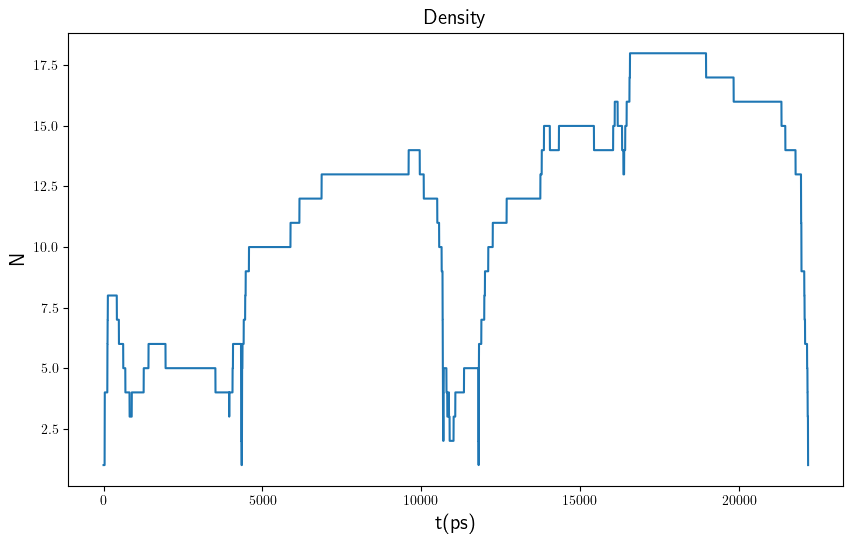

In [36]:
import matplotlib.pyplot as plt

dense = sP.getDense(containers, mains[0])
length = sP.getLength(containers, mains[0])
activity = sP.getActivity(containers, mains[0])

x = np.arange(0,22180)

#observable = 'Avg Length Through Time'
#observabley = 'Avg(Length)'
observable = 'Density'
observabley = 'N'
#observable = 'Activity'
#observabley('Avg(Activity)')

observablex = 't(ps)'

f = plt.figure(figsize=(10,6), dpi=100)

plt.plot(x, dense)
plt.title(f'{observable}',fontdict={'size':15})
plt.ylabel(f'{observabley}',fontdict={'size':15})
plt.xlabel(f'{observablex}',fontdict={'size':15})

Given the accessible, and simple, data structure of the containing spans, we can easily conjure up functions on the fly. For instance, say I wanted to obtain the actual distribution of lengths between all of the containing spans. Writing a whole other function may be overkill, but we can do it.


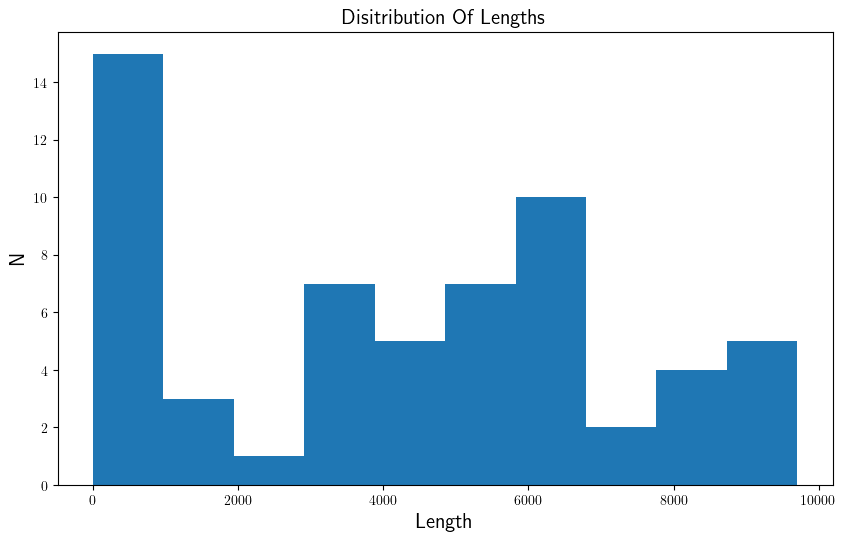

In [29]:
def getLengths(SiMap):
    """Return a list of all the lengths of all spans in SiMap"""

    # Instantiate return object
    retList = []

    # Iterate throguh the keys, gather the lengths
    for key in SiMap.keys():
        if len(SiMap[key].S) != 1:
            retList.append(len(SiMap[key].S))

    return retList

lengths = getLengths(containers)

f = plt.figure(figsize=(10,6), dpi=100)

plt.hist(lengths)
plt.title('Disitribution Of Lengths',fontdict={'size':15})
plt.ylabel('N',fontdict={'size':15})
plt.xlabel('Length',fontdict={'size':15})
plt.savefig('C:/Users/Joshu/Desktop/for_4122023/LengthDist.png', transparent = True, dpi = 600)

Perhaps we are interested in observing what, if any, spans are contained by two separate containers. Having information like this will help us find any particularly interesting groups of spans. As you will recall, when we computed the containing spans we obtained a dictionary that showed what spans are contained in each container. As a first step, let us get a complete list of these spans.

In [5]:
# This set will hold all the defining zones that define the subspans that are shared among any or all containers
inCommon = set()

# Go through a nested for loop checking pair-wise simiarities
for key1 in containDict.keys():
    for key2 in containDict.keys():
        if key1 != key2:
            #create a temporary variable that will hold the intersection of the subspas
            temp = set()

            subs1  = containDict[key1]
            subs2 = containDict[key2]

            temp = subs1.intersection(subs2)

            inCommon = inCommon.union(temp)

# I want to be able to analyze these spans closer, so we'll put them into their own mapping
# object

sharedSubs = {}

for z in inCommon:
    sharedSubs.update({z:SiMap[z]})

Lets look at the distribution of lengths. I theorize that we may expect smaller lengths on average, with high lengths being particularly rare.

Text(0.5, 0, 'Length')

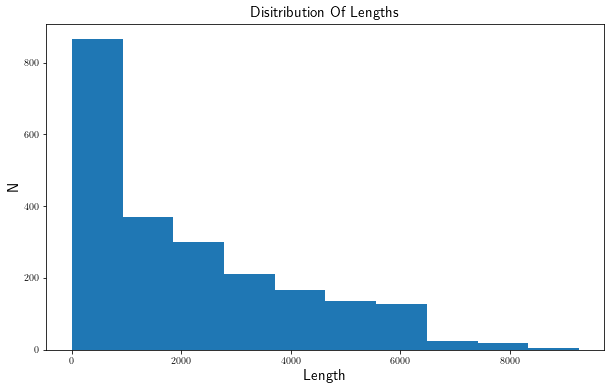

In [30]:
lengths = getLengths(sharedSubs)

f = plt.figure(figsize=(10,6))

plt.hist(lengths)
plt.title('Disitribution Of Lengths',fontdict={'size':15})
plt.ylabel('N',fontdict={'size':15})
plt.xlabel('Length',fontdict={'size':15})

As we can see, the lengths tend to be, on average smaller. This is especially true relative to the containing spans.

So far, we have been able to get some quantitative information about these shared subspans. I want to understand it graphically however. To do this, we can visualize the spans very easily in the R-Theta Plane. In fact, let us see where they are positioned relative to the containing spans. This might give us some insight into grouping.

In [15]:
# In order to use the plotting utility, we'll need to have a complete list of the actual span objects, not their identifier

SiList = []

for key in sharedSubs:
    SiList.append(sharedSubs[key])

colors = genColor(len(SiList))

sP.plotSpans('C:/Users/Joshu/Desktop/for_4122023', 'sharedSubs', 'Shared Subspans', SiList, zoneDict[7], colors)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [14]:
SiContaining = []

for key in containers:
    SiContaining.append(containers[key])

colors = genColor(len(SiContaining))
sP.plotSpans('C:/Users/Joshu/Desktop/for_4122023', 'Containers', 'Containing Spans', SiContaining, zoneDict[7], colors)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
--> Saving Containers.png to C:/Users/Joshu/Desktop/for_4122023


By this point we can observe the following:
    - The number of subspans shared between containing spans is large. In fact, all together they occupy a majority of the parameters space.
    - The lengths of these subspans tend to be smaller on average than that of the containing span.

Current Question Then: How do we handle the grouping procedure then? That is, even if we are successful in finding t* points within the density data. We have yet to come up with a way to handle the case that subspans are shared among the containing spans incident at this point.

Ideas I have been thinking and working on implementing: Simply give the shared subspans to the container that is defined at an earlier time (see reasoning below), characterize each span via an energy measurement. Doing this, we allow for the grouping of the shared subsapsn to the container which best matches its energy. Ideally, we would like to avoid grouping together spans which present very different dynamics. The goal is, as I understand it, is to gather groups that show distinct physically meaningful traits. Lastly, abandon the idea of static groups, and instead, construct groups based on a time interval. This was an idea that was brought up during the summer, and possibly one that may resolve the issue of shared subspans.

My thinking: Our interest lies in resolving how the dynamics of the ring impose upon it a need to change it's shape in time, or more simply crumple. Now consider the case that you have identified a point of minimum density, i.e. a t* point (threshold = 2). And so, you come to realize that these two hypothetical spans share among them a set of subspans.

                                                                                    S1 := Containing Span 1
                                                                                    S2 := Containing Span 2

                                                                                    SUB := Set of Subspans contained in BOTH S1 and S2

The span, as I see it, is an object that tells us about the following:
                                                                                    -How the ring changes over a given time interval (the interval over
                                                                                     which the span is defined)
                                                                                    -What is possible for the ring, in terms of shape parameters, to achieve
                                                                                     within that interval, energy permitting (which might be something we
                                                                                     would want to look at in terms of a "deciding" factor for these sorts
                                                                                     of span disputes).

Thus, if S1 appears earlier than S2, SUB should be considered as a part of S1 and vice-versa. Let us try to see results of doing this.

Ideas: Group the shared set of subspans to the container of the smallest length.


We will first need to identify the T-star points. This is easy given we have a threshold of interest and a set of data describing containing span density. We have both of these, so we will put them to use.

NOTE THE FOLLOWING SECTIONS ARE STILL UNDER DEVELOPMENT

In [20]:
thresh = 2

# Use numpy method to find where the denisty is less than or equal to the threshold
tStar = np.where(dense<=thresh)
tStar = tStar[0]
# These are going to be intervals of time, so we are going to need to organize it slightly
intervals = []
curInt = []
for t in range(1, len(tStar)):
    if t == 1:
        t1 = 0
        if (tStar[t]-tStar[t-1]) != 1:
            intervals.append(tStar[t1:t])
            t1 = t
    else:
        if (tStar[t]-tStar[t-1]) != 1:
            intervals.append(tStar[t1:t])
            t1 = t

intervals

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34], dtype=int64),
 array([4333, 4334, 4335, 4336, 4337, 4338, 4339, 4340, 4341, 4342, 4343,
        4344, 4345, 4346, 4347, 4348, 4349, 4350, 4351, 4352, 4353, 4354,
        4355, 4356], dtype=int64),
 array([10690, 10691, 10692, 10693, 10694, 10695, 10696, 10697, 10698,
        10699, 10700, 10701], dtype=int64),
 array([10893, 10894, 10895, 10896, 10897, 10898, 10899, 10900, 10901,
        10902, 10903, 10904, 10905, 10906, 10907, 10908, 10909, 10910,
        10911, 10912, 10913, 10914, 10915, 10916, 10917, 10918, 10919,
        10920, 10921, 10922, 10923, 10924, 10925, 10926, 10927, 10928,
        10929, 10930, 10931, 10932, 10933, 10934, 10935, 10936, 10937,
        10938, 10939, 10940, 10941, 10942, 10943, 10944, 10945, 10946,
        10947, 10948, 10949, 10950, 10951, 10952, 10953, 10954, 10955,
        10956, 10957, 1095

Now that we have this information, it is simply a matter of getting the containers that exists in these intervals, settling the case of shared subsspans, and then labeling

In [ ]:
for inter in intervals:
    spanGroups = []
    # What defining zones are in this interval?
    zones = set(mains[0][inter[0]:inter[len(inter)-1]])
    containerZones  = set(containers.keys())
    zones = zones.intersection(containerZones)
    # Now, use the SiMap to gather all the spans for these zones
    for z in zones:
        spanGroups.append(SiMap[z])

    # Now